In [1]:
# Predict humidity at 3 pm

# * Problem statement:
* Create a Model that will help me predict relative humidity at 3 PM

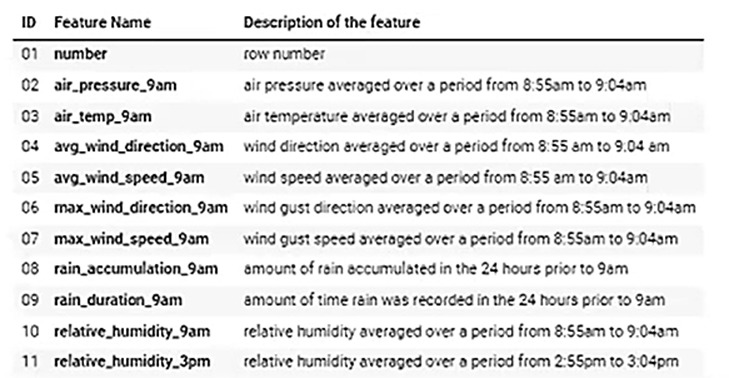

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("daily_weather.csv")
data.head()

number  air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
0       0        918.060000     74.822000              271.100000   
1       1        917.347688     71.403843              101.935179   
2       2        923.040000     60.638000               51.000000   
3       3        920.502751     70.138895              198.832133   
4       4        921.160000     44.294000              277.800000   

   avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  \
0            2.080354              295.400000            2.863283   
1            2.443009              140.471548            3.533324   
2           17.067852               63.700000           22.100967   
3            4.337363              211.203341            5.190045   
4            1.856660              136.500000            2.863283   

   rain_accumulation_9am  rain_duration_9am  relative_humidity_9am  \
0                    0.0                0.0              42.420000   
1                    0.0                0.0              24.328697   
2                    0.0               20.0               8.900000   
3                    0.0                0.0              12.189102   
4                    8.9            14730.0              92.410000   

   relative_humidity_3pm  
0              36.160000  
1              19.426597  
2              14.460000  
3              12.742547  
4              76.740000

In [4]:
data.shape
# rows= 1095 col= 11

(1095, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  1095 non-null   int64  
 1   air_pressure_9am        1092 non-null   float64
 2   air_temp_9am            1090 non-null   float64
 3   avg_wind_direction_9am  1091 non-null   float64
 4   avg_wind_speed_9am      1092 non-null   float64
 5   max_wind_direction_9am  1092 non-null   float64
 6   max_wind_speed_9am      1091 non-null   float64
 7   rain_accumulation_9am   1089 non-null   float64
 8   rain_duration_9am       1092 non-null   float64
 9   relative_humidity_9am   1095 non-null   float64
 10  relative_humidity_3pm   1095 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB


In [6]:
# find missing value
data.isnull().sum()

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [7]:
# data.fillna({"air_pressure_9am":data["air_pressure_9am"].median(),
#             "air_temp_9am":data["air_temp_9am"].median(),
#             "avg_wind_direction_9am":data["avg_wind_direction_9am"].median(),
#             "avg_wind_speed_9am":data["avg_wind_speed_9am"].median(),
#             "max_wind_direction_9am":data["max_wind_direction_9am"].median(),
#             "max_wind_speed_9am":data["max_wind_speed_9am"].median(),
#             "rain_accumulation_9am":data["rain_accumulation_9am"].median(),
#             "rain_duration_9am":data["rain_duration_9am"].median()},inplace=True)


In [8]:
data.isna().sum()

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [9]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [10]:
col_missing_value=['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am']

In [11]:
for col in col_missing_value:
    md=data[col].median()
    print(f"median value in {md} of column is {col}")
    data.fillna({col:md},inplace=True)

median value in 918.9210452583593 of column is air_pressure_9am
median value in 65.7154790488537 of column is air_temp_9am
median value in 166.0 of column is avg_wind_direction_9am
median value in 3.8713333518840805 of column is avg_wind_speed_9am
median value in 177.29999999999993 of column is max_wind_direction_9am
median value in 4.943637399999937 of column is max_wind_speed_9am
median value in 0.0 of column is rain_accumulation_9am
median value in 0.0 of column is rain_duration_9am


In [12]:
data.isna().sum()

number                    0
air_pressure_9am          0
air_temp_9am              0
avg_wind_direction_9am    0
avg_wind_speed_9am        0
max_wind_direction_9am    0
max_wind_speed_9am        0
rain_accumulation_9am     0
rain_duration_9am         0
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [13]:
x=data.drop(["number","relative_humidity_3pm"],axis=1)
x.head()

air_pressure_9am  air_temp_9am  avg_wind_direction_9am  avg_wind_speed_9am  \
0        918.060000     74.822000              271.100000            2.080354   
1        917.347688     71.403843              101.935179            2.443009   
2        923.040000     60.638000               51.000000           17.067852   
3        920.502751     70.138895              198.832133            4.337363   
4        921.160000     44.294000              277.800000            1.856660   

   max_wind_direction_9am  max_wind_speed_9am  rain_accumulation_9am  \
0              295.400000            2.863283                    0.0   
1              140.471548            3.533324                    0.0   
2               63.700000           22.100967                    0.0   
3              211.203341            5.190045                    0.0   
4              136.500000            2.863283                    8.9   

   rain_duration_9am  relative_humidity_9am  
0                0.0              42.420000  
1                0.0              24.328697  
2               20.0               8.900000  
3                0.0              12.189102  
4            14730.0              92.410000

In [14]:
y=data["relative_humidity_3pm"]
y

0       36.160000
1       19.426597
2       14.460000
3       12.742547
4       76.740000
          ...    
1090    38.180000
1091    73.340000
1092    52.310000
1093    58.280000
1094    15.100000
Name: relative_humidity_3pm, Length: 1095, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3243287,shuffle=True)
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_test {y_test.shape}")

x_train (876, 9)
y_train (876,)
x_test (219, 9)
y_test (219,)


In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
dtr=DecisionTreeRegressor()
# train model
dtr.fit(x_train,y_train)
# eveluate model
y_pred=dtr.predict(x_test)
y_pred

array([39.21      , 18.76      , 56.93      , 47.71      , 51.91      ,
        7.30218051, 36.68      , 16.79245463, 19.9765781 , 22.84121232,
       13.17715066, 56.93      , 16.79245463, 41.31      , 18.40222328,
       17.41      , 23.68297841, 38.36      , 29.89      , 14.4952428 ,
       15.67297888, 16.47641162, 55.15      , 61.12      , 18.95075085,
       35.7       , 21.77      , 21.69      , 44.82      , 56.45      ,
       19.59      , 51.1       , 40.65      , 52.1       , 16.15894313,
       15.32410468, 70.32      , 65.04      , 51.96      , 19.81538851,
       17.25880526, 22.93      , 41.24      , 13.40171202, 43.63      ,
       91.06      , 50.38      , 65.04      , 24.27      , 43.92      ,
       47.16      , 25.14      , 22.18990678, 87.29      , 15.52      ,
       35.18      , 19.81538851, 14.96107362, 12.15540564, 68.26      ,
       16.9971455 , 11.4117152 , 16.87177039,  7.42      , 92.15      ,
       89.4       , 16.32780669, 10.96656163, 13.35131297, 22.26

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [20]:
rmse=sqrt(mean_squared_error(y_test,y_pred))
rmse

11.013316257445867

In [21]:
from sklearn.metrics import r2_score
r_square=r2_score(y_test,y_pred)
r_square

0.7371757943804115

In [22]:
from sklearn.tree import export_graphviz # create tree , visulize tree
import pydotplus
from IPython.display import Image # disaplay tree
# Generate a pydot file
dot_tree = export_graphviz(decision_tree=dtr,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           )

# Generate graph using pydot file
graph = pydotplus.graph_from_dot_data(dot_tree)
# Display the graph
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.541022 to fit

(process:8292): GLib-GIO-WARNING **: 10:28:56.939: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2405.32.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:8292): GLib-GIO-WARNING **: 10:28:56.970: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2024.619.100_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 4 extensions but has no verbs

(process:8292): GLib-GIO-WARNING **: 10:28:57.019: Unexpectedly, UWP app `Clipchamp.Clipchamp_3.1.10920.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



In [23]:
# with hyper parameters 

In [24]:
dtr_hyper=DecisionTreeRegressor(min_samples_split=100,max_depth=5)
# train model
dtr_hyper.fit(x_train,y_train)
# eveluate model
y_pred_with_hyper_parameter=dtr_hyper.predict(x_test)
print(y_pred)
rmse=sqrt(mean_squared_error(y_test,y_pred_with_hyper_parameter))
print("Rmse",rmse)
r_square=r2_score(y_test,y_pred)
print("R Square",r_square)

[39.21       18.76       56.93       47.71       51.91        7.30218051
 36.68       16.79245463 19.9765781  22.84121232 13.17715066 56.93
 16.79245463 41.31       18.40222328 17.41       23.68297841 38.36
 29.89       14.4952428  15.67297888 16.47641162 55.15       61.12
 18.95075085 35.7        21.77       21.69       44.82       56.45
 19.59       51.1        40.65       52.1        16.15894313 15.32410468
 70.32       65.04       51.96       19.81538851 17.25880526 22.93
 41.24       13.40171202 43.63       91.06       50.38       65.04
 24.27       43.92       47.16       25.14       22.18990678 87.29
 15.52       35.18       19.81538851 14.96107362 12.15540564 68.26
 16.9971455  11.4117152  16.87177039  7.42       92.15       89.4
 16.32780669 10.96656163 13.35131297 22.26632503 42.05       41.24
 29.69       55.52       15.67259273 28.51       38.23       22.05724342
 41.85       90.21       65.87       38.79       61.05       79.38
  7.18736098 46.66       63.2         9.98407

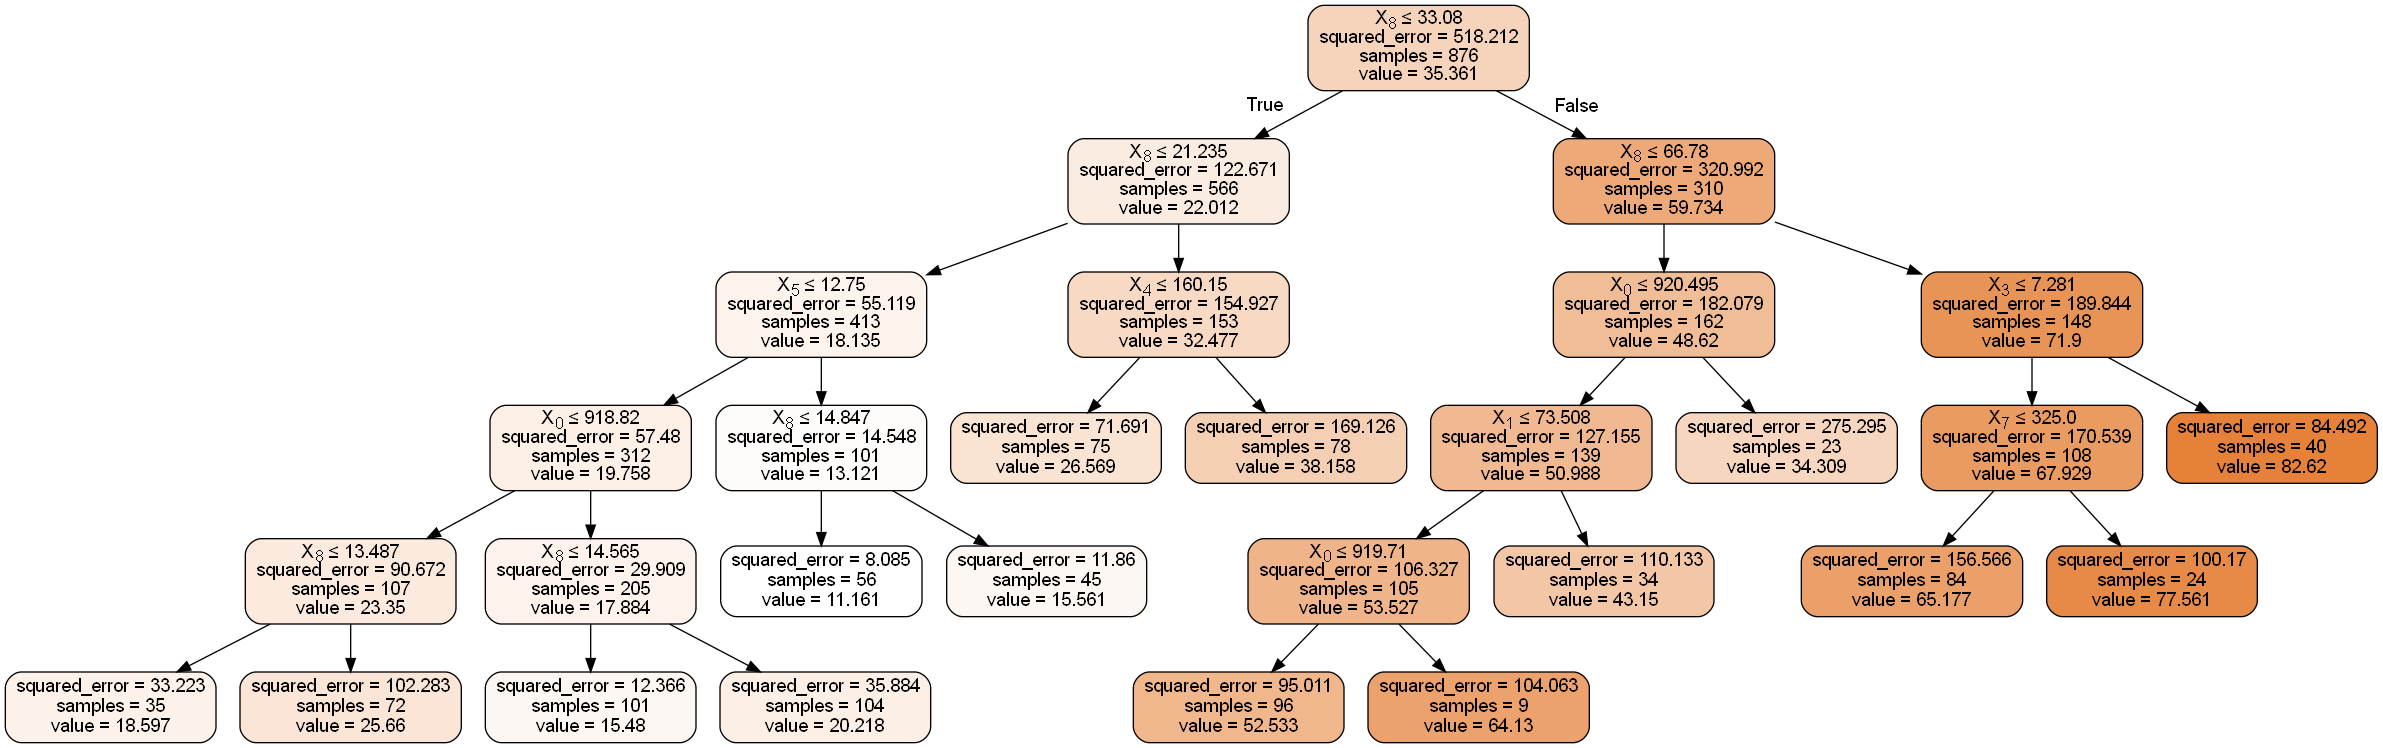

In [25]:
from sklearn.tree import export_graphviz # create tree , visulize tree
import pydotplus
from IPython.display import Image # disaplay tree
# Generate a pydot file
dot_tree = export_graphviz(decision_tree=dtr_hyper,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           )

# Generate graph using pydot file
graph = pydotplus.graph_from_dot_data(dot_tree)
# Display the graph
Image(graph.create_png())

In [58]:
import pickle
pickle.dump(dtr_hyper,open("decision_tree_model.pkl","wb"))

In [27]:
data["classify"]=data["relative_humidity_3pm"]>=data["relative_humidity_3pm"].median()

In [ ]:
data.dtypes

In [ ]:
data["classify"].astype("int64")

In [ ]:
y_v1=data["classify"]

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y_v1,test_size=0.2,random_state=3243287,shuffle=True)
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_test {y_test.shape}")

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_dtc_pred=dtc.predict(x_test)
print(y_dtc_pred)

In [ ]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,y_dtc_pred))